# Fashion MNIST Classification

## This code was submitted earler as part of the fashion MNIST assignment

## Importing the Fashion MNIST Dataset

In [ ]:
# import statements

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)

2.8.2


In [ ]:
# import the fashion mnist dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# key for label numbers to what they represent
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4431872/4422102 [==============================] - 0s 0us/step


## Exploring the Data

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_images)

10000

## Preprocessing

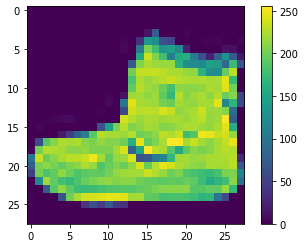

In [ ]:
# Show an example of a training image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Scaling all the values in the bitmap images to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

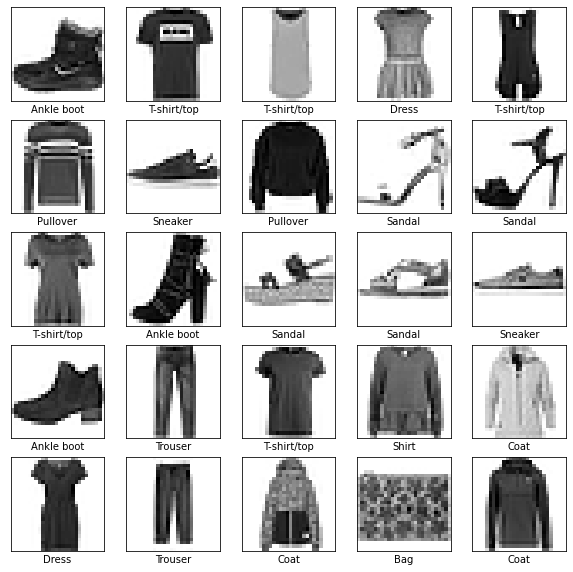

In [ ]:
# Plotting 25 images and their label
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Creating the Model

In [ ]:
def create_model(learning_rate):
  # Constructing the neural network
  model = models.Sequential()
  model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  # model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  # model.add(layers.MaxPooling2D((2, 2)))
  # model.add(layers.Conv2D(64, (3, 3), activation='relu'))

  model.add(layers.Flatten()),
  #tf.keras.layers.Dropout(rate=0.2),
  model.add(layers.Dense(64, activation="relu")),
  #tf.keras.layers.Dropout(rate=0.4),
  #tf.keras.layers.Dense(512, activation="relu"),

  model.add(layers.Dense(10))


      # Compiling the neural network
  model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

  return model

def train_model(model, train_images, train_labels, epochs):
  model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))

Epoch 1/15
1875/1875 [==============================] - 55s 29ms/step - loss: 0.3788 - accuracy: 0.8654 - val_loss: 0.3395 - val_accuracy: 0.8765
Epoch 2/15
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2585 - accuracy: 0.9067 - val_loss: 0.2778 - val_accuracy: 0.8956
Epoch 3/15
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2153 - accuracy: 0.9201 - val_loss: 0.2598 - val_accuracy: 0.9072
Epoch 4/15
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1847 - accuracy: 0.9324 - val_loss: 0.2560 - val_accuracy: 0.9100
Epoch 5/15
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1581 - accuracy: 0.9411 - val_loss: 0.2570 - val_accuracy: 0.9135
Epoch 6/15
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1356 - accuracy: 0.9504 - val_loss: 0.2605 - val_accuracy: 0.9152
Epoch 7/15
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1166 - accuracy: 0.9567 - val_loss: 0.2723 -

KeyboardInterrupt: ignored

In [ ]:
# Hyperparameters
#learning_rate = 0.001
epochs = 15
#validation_split = 0.1

# Call the create model function
model = create_model()
model.summary()
# Train the model
train_model(model, train_images, train_labels, epochs=epochs)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_8 (Flatten)         (None, 1024)             

ValueError: in user code:

    File "/Users/devesh/Library/Python/3.8/lib/python/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/Users/devesh/Library/Python/3.8/lib/python/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/devesh/Library/Python/3.8/lib/python/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/Users/devesh/Library/Python/3.8/lib/python/site-packages/keras/engine/training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "/Users/devesh/Library/Python/3.8/lib/python/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/devesh/Library/Python/3.8/lib/python/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(32, 28, 28)


In [ ]:
# Accuracy on Test Set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)
model.summary()

313/313 - 2s - loss: 0.4168 - accuracy: 0.9113 - 2s/epoch - 7ms/step

Test accuracy: 0.911300003528595
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 10816)             0         
                                                                 
 dense_6 (Dense)             (None, 64)                692288    
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 693

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model(test_images)
predictions[0]
np.argmax(predictions[0])


9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
    100*np.max(predictions_array), class_names[true_label]),color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")


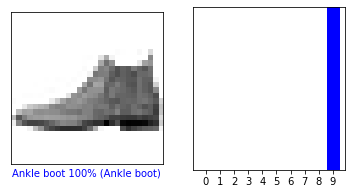

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

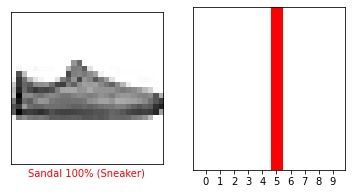

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

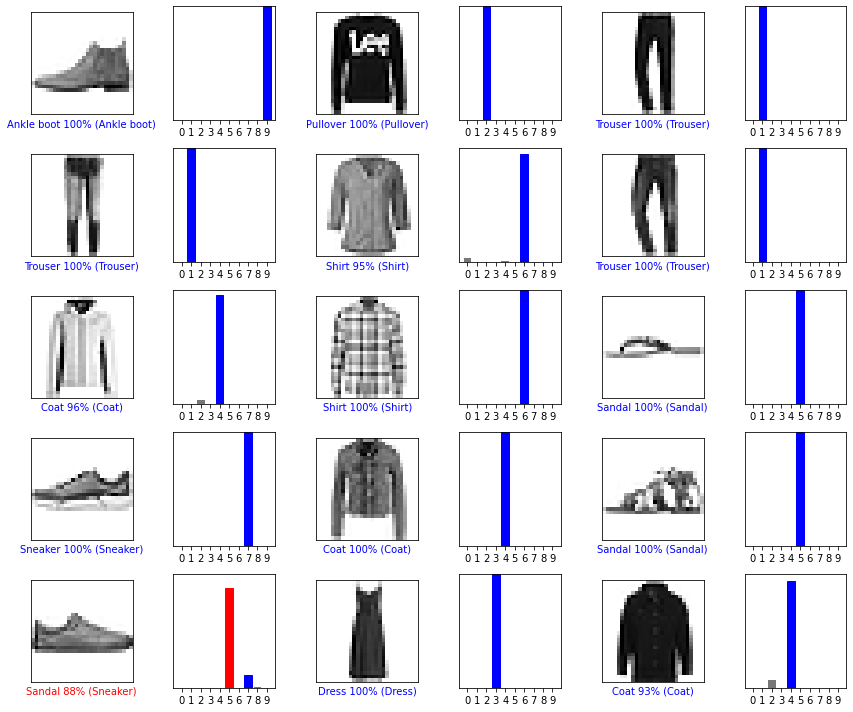

In [ ]:
# Visualization of the results
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 31ms/step
[[9.5824689e-05 1.0582772e-11 9.9652666e-01 2.1787548e-10 3.3579012e-03
  2.6758758e-07 1.9418405e-05 2.2767658e-14 3.0092735e-09 4.4153202e-15]]


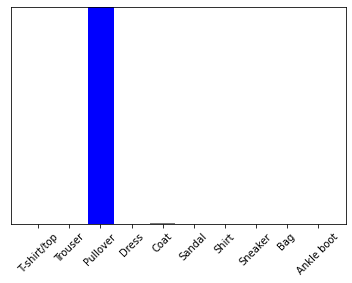

Pullover


In [ ]:
# Testing on a single image
img = test_images[1]
print(img.shape)
img = np.expand_dims(img,0)
print(img.shape)

predictions_single = probability_model.predict(img)
print(predictions_single)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()
print(class_names[np.argmax(predictions_single[0])])